In [ ]:
import os
import numpy as np
import pandas as pd


# Only coef trainable
#experiment_path = "mlruns/321789580145211192/" # width-depth-noise-10
#experiment_path = "mlruns/171415219485281552/" # width-depth-noise-11

# Fully trainable
#experiment_path = "mlruns/623138425758637194/" # wdn-fully-trainable-05
#experiment_path = "mlruns/568112006897720611/" # wdn-fully-trainable-07

experiment_path = "mlruns/304011615549720488/" # wdn-native-coef-02
#experiment_path = "mlruns/289991518647560670/" # wdn-native-full-02

run_paths = [os.path.join(experiment_path, name) for name in os.listdir(experiment_path) if os.path.isdir(os.path.join(experiment_path, name))]


experiment_df = pd.DataFrame()
for rp in run_paths:
    #print(rp)


    # load params
    params_df = pd.DataFrame()
    params_path = os.path.join(rp, "params")
    for param_name in os.listdir(params_path):
        param_file = os.path.join(params_path, param_name)
        df = pd.read_csv(param_file, sep=' ', header=None)
        #df.columns = ['Value']
        params_df[param_name] = df[0]
        #run_df[metric_name] = metric_df['Value']

    #print(params_df)
    #break

    metrics_df = pd.DataFrame()
    metrics_path = os.path.join(rp, "metrics") 
    for metric_name in os.listdir(metrics_path):
        metric_file = os.path.join(metrics_path, metric_name)

        df = pd.read_csv(metric_file, sep=' ', header=None)
        df.columns = ['Timestamp', 'Value', 'Index']

        if metrics_df.empty:
            metrics_df["step"] = df['Index']

        metrics_df[metric_name] = df['Value']

        ###

    if not params_df.empty and not metrics_df.empty:
        df1_repeated = pd.concat([params_df]*metrics_df.shape[0], ignore_index=True)
        run_df = pd.concat([df1_repeated, metrics_df], axis=1)
        #print(result_horizontal)
        #break

        experiment_df = pd.concat([experiment_df, run_df], axis=0, ignore_index=True)



In [1]:
experiment_df.head

NameError: name 'experiment_df' is not defined

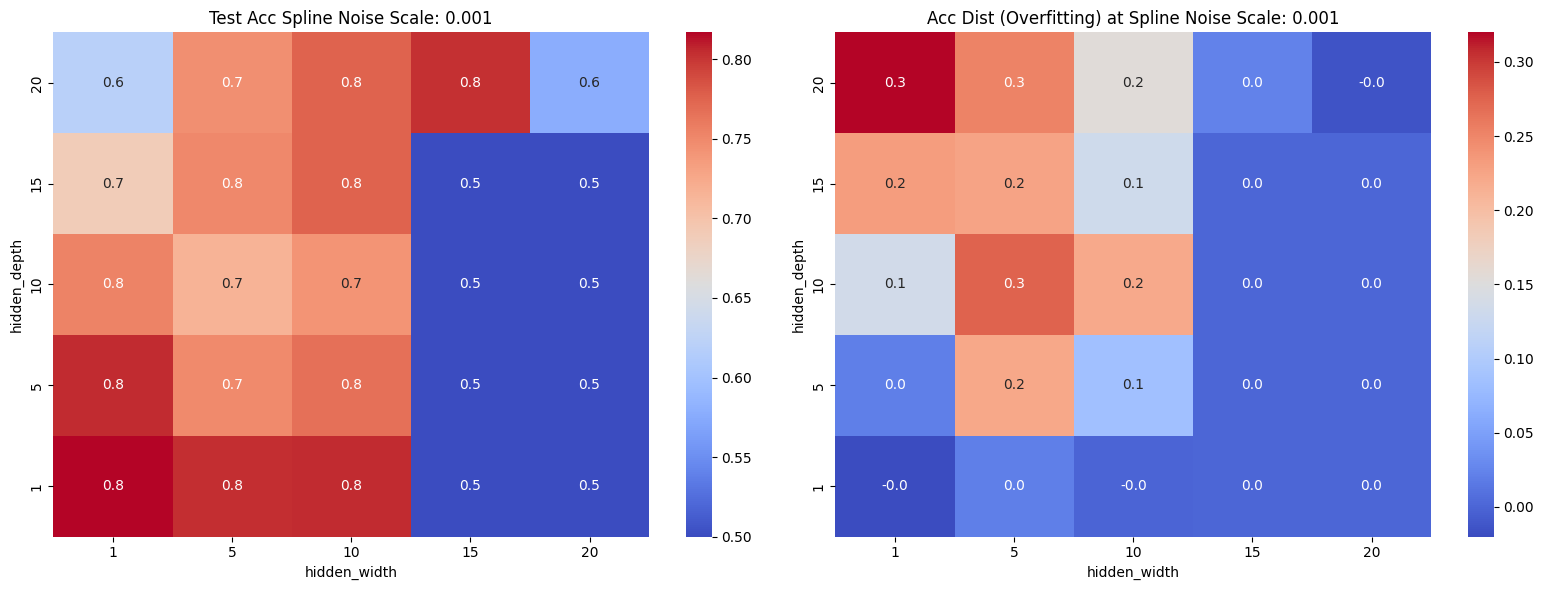

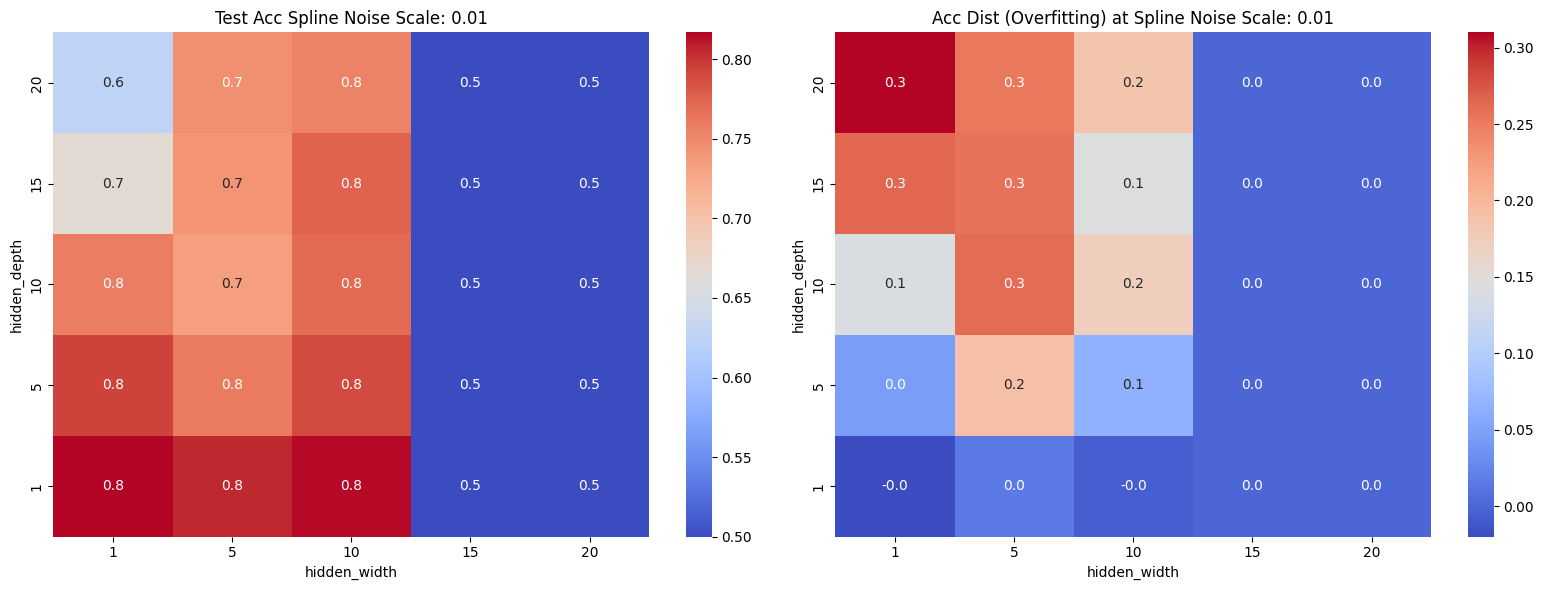

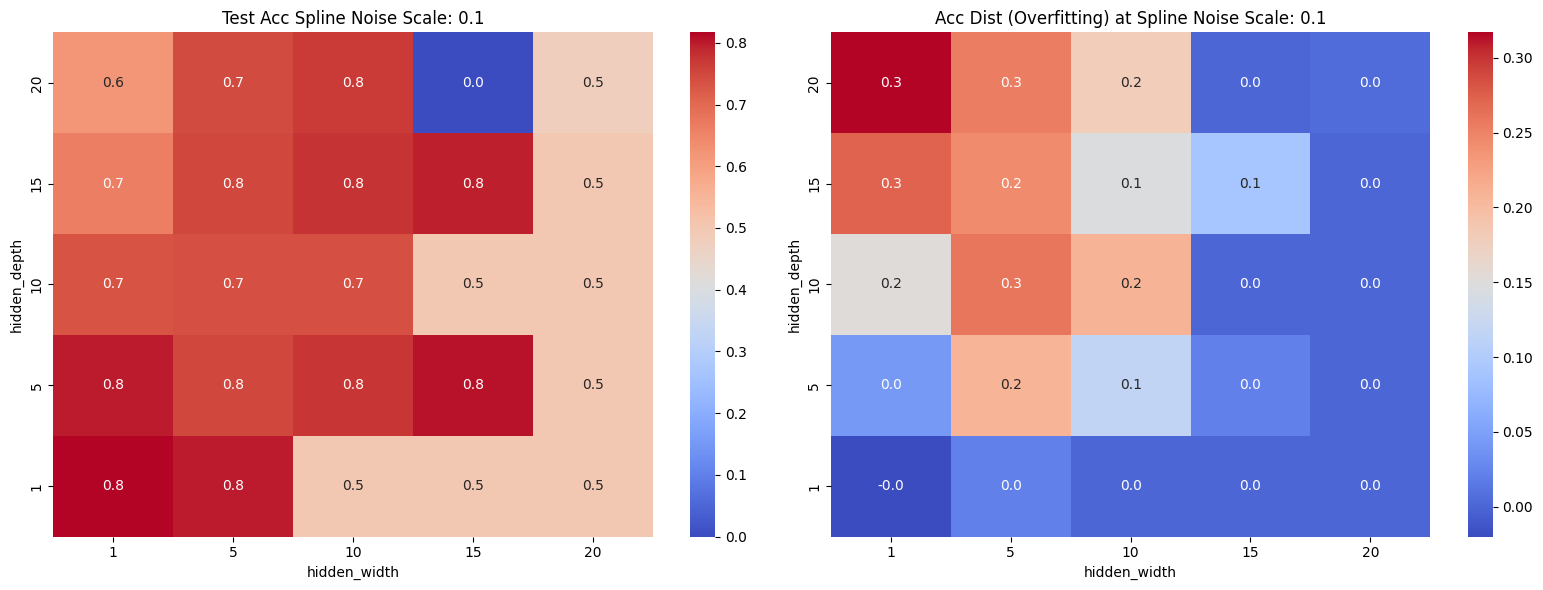

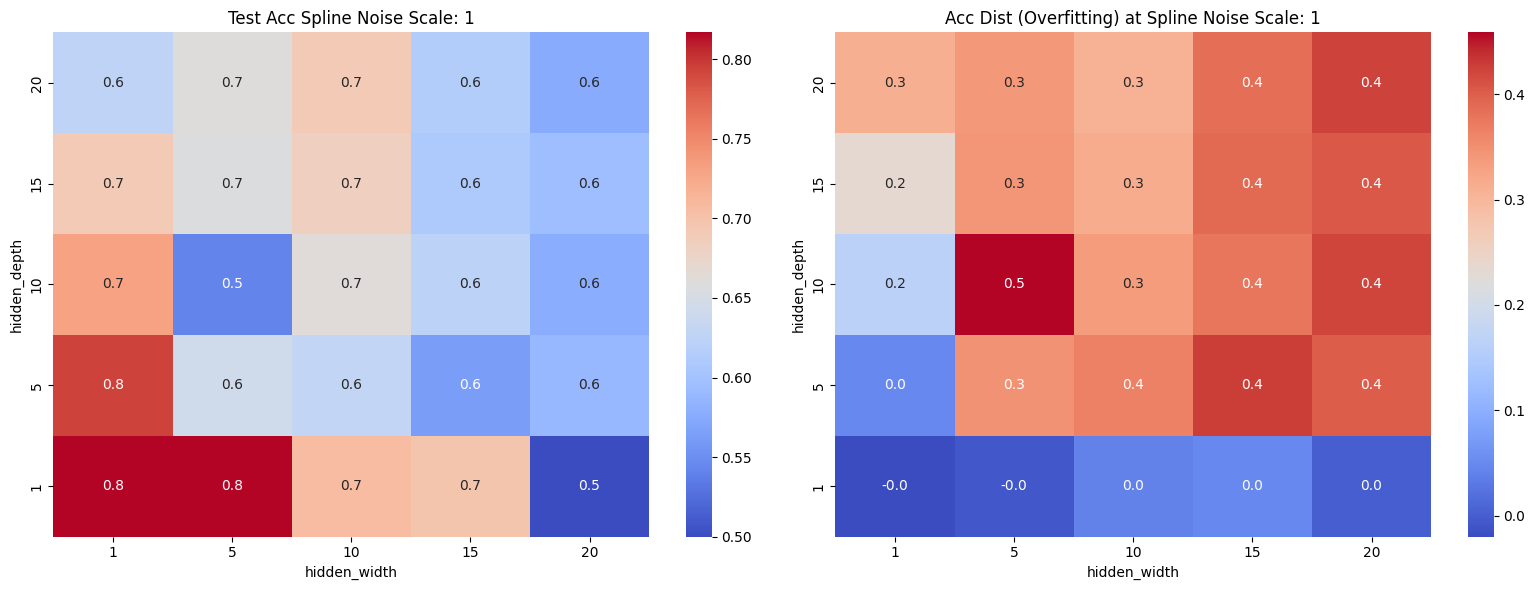

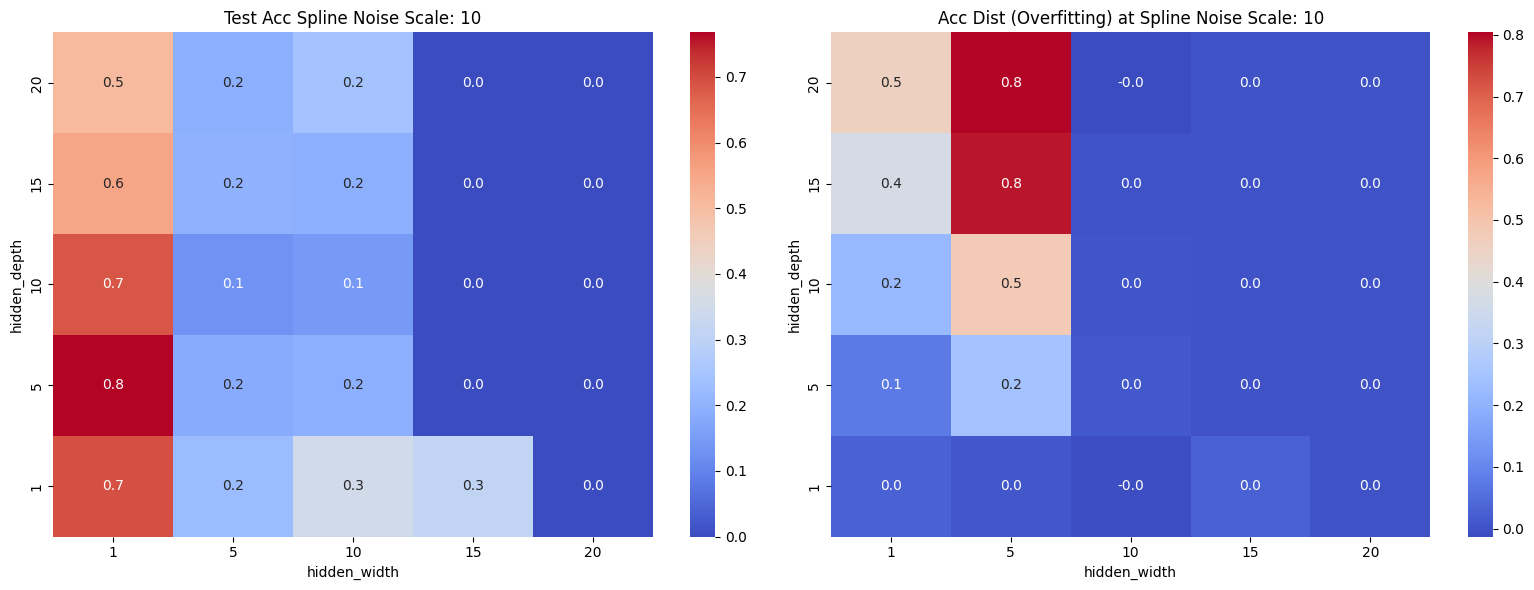

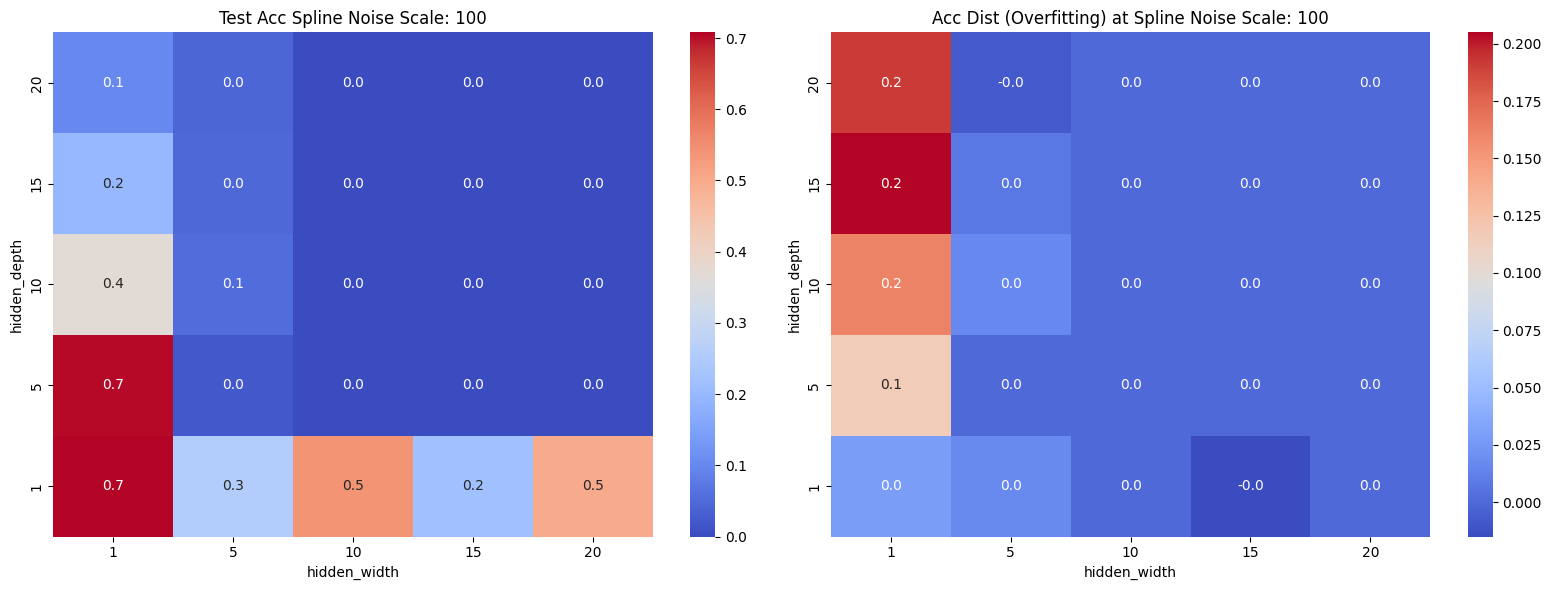

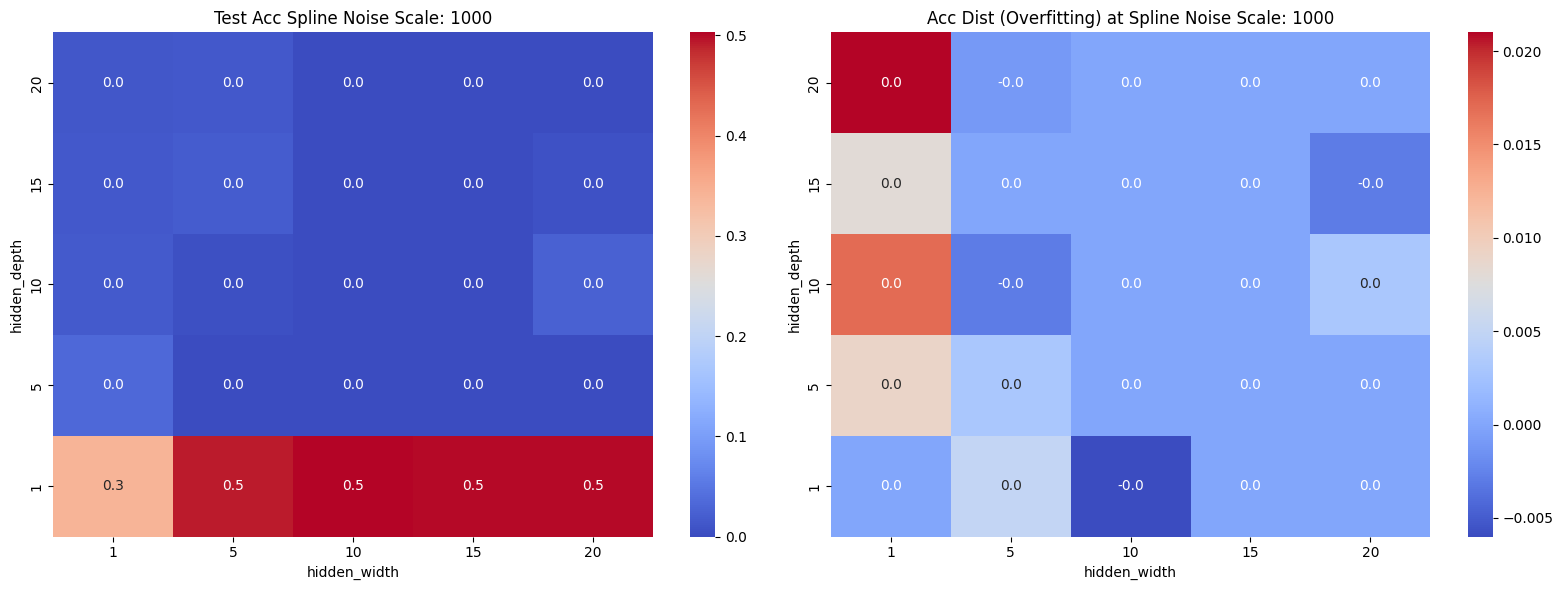

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

noise_scales = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

for ns in noise_scales:
    filtered_df = experiment_df
    filtered_df = filtered_df[filtered_df['spline_noise_scale'] == ns]
    filtered_df = filtered_df[filtered_df['step'] == 99]
    filtered_df["acc_dist"] = filtered_df['train_acc'] - filtered_df['test_acc']


    # Step 2: Pivot the DataFrame
    # We will pivot the DataFrame to have 'B' as columns, 'A' as index, and 'C' as values
    test_acc_df = filtered_df.pivot_table(index='hidden_width', columns='hidden_depth', values='test_acc', fill_value=0)
    acc_dist_df = filtered_df.pivot_table(index='hidden_width', columns='hidden_depth', values='acc_dist', fill_value=0)

    # Display the pivoted DataFrame
    #print("\nPivoted DataFrame:")
    #print(test_acc_df)

    # # Step 3: Create the heatmap
    # plt.figure(figsize=(8, 6))  # Set the figure size
    # sns.heatmap(test_acc_df, annot=True, cmap='coolwarm', fmt=".1f")  # Create the heatmap
    # sns.heatmap(acc_dist_df, annot=True, cmap='coolwarm', fmt=".1f")  # Create the heatmap

    # # Customize the heatmap
    # plt.title(f'Test Acc Spline Noise Scale: {ns}')
    # plt.xlabel('hidden_depth')
    # plt.ylabel('hidden_width')

    # # Step 4: Show the heatmap
    # plt.show()

    # # Create a figure with 1 row and 2 columns

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Adjust the figsize as needed


    # Create the first heatmap
    sns.heatmap(test_acc_df, annot=True, cmap='coolwarm', fmt=".1f", ax=axes[0])  # Create the first heatmap
    axes[0].set_title(f'Test Acc Spline Noise Scale: {ns}')  # Set title for the first heatmap
    axes[0].set_xlabel('hidden_width')  # Set x-label for the first heatmap
    axes[0].set_ylabel('hidden_depth')  # Set y-label for the first heatmap
    axes[0].invert_yaxis()

    # Create the second heatmap
    sns.heatmap(acc_dist_df, annot=True, cmap='coolwarm', fmt=".1f", ax=axes[1])  # Create the second heatmap
    axes[1].set_title(f'Acc Dist (Overfitting) at Spline Noise Scale: {ns}')  # Set title for the second heatmap
    axes[1].set_xlabel('hidden_width')  # Set x-label for the second heatmap
    axes[1].set_ylabel('hidden_depth')  # Set y-label for the second heatmap
    axes[1].invert_yaxis()

    # Adjust layout
    plt.tight_layout()

    # Show the heatmaps
    plt.show()

# Conclusions

- It is easier to make KANs deep, in comparison to the width
- Width is harder, since the variances get add up?
- Noise Scale very big results in collapse (100, 1000)
- Noise Scale big results in overfitting (10)
- Noise Scale small creates good results (0.001, 0.01, 0.1, 1)
- It might be favorable if the noise_scale is 1?
